In [ ]:
!wget -N https://data.rivm.nl/covid-19/COVID-19_aantallen_gemeente_per_dag.csv

In [61]:
import pandas as pd
import numpy  as np
import re

from pyearth import Earth
from pyearth import export

#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

%matplotlib inline

In [62]:
df = pd.read_csv('COVID-19_aantallen_gemeente_per_dag.csv', sep=';', parse_dates=[0, 1], infer_datetime_format=True)
df

Date_of_report Date_of_publication Municipality_code  \
0      2021-12-29 10:00:00          2020-02-28            GM0014   
1      2021-12-29 10:00:00          2020-02-28            GM0034   
2      2021-12-29 10:00:00          2020-02-28            GM0037   
3      2021-12-29 10:00:00          2020-02-28            GM0047   
4      2021-12-29 10:00:00          2020-02-28            GM0050   
...                    ...                 ...               ...   
253633 2021-12-29 10:00:00          2021-12-29               NaN   
253634 2021-12-29 10:00:00          2021-12-29               NaN   
253635 2021-12-29 10:00:00          2021-12-29               NaN   
253636 2021-12-29 10:00:00          2021-12-29               NaN   
253637 2021-12-29 10:00:00          2021-12-29               NaN   

       Municipality_name       Province Security_region_code  \
0              Groningen      Groningen                 VR01   
1                 Almere      Flevoland                 VR25   
2            Stadskanaal      Groningen                 VR01   
3                Veendam      Groningen                 VR01   
4               Zeewolde      Flevoland                 VR25   
...                  ...            ...                  ...   
253633               NaN        Limburg                 VR23   
253634               NaN        Limburg                 VR24   
253635               NaN   Zuid-Holland                 VR15   
253636               NaN        Fryslân                 VR02   
253637               NaN  Noord-Holland                 VR11   

        Security_region_name  Municipal_health_service  \
0                  Groningen             GGD Groningen   
1                  Flevoland             GGD Flevoland   
2                  Groningen             GGD Groningen   
3                  Groningen             GGD Groningen   
4                  Flevoland             GGD Flevoland   
...                      ...                       ...   
253633         Limburg-Noord         GGD Limburg-Noord   
253634          Limburg-Zuid          GGD Zuid-Limburg   
253635            Haaglanden            GGD Haaglanden   
253636               Fryslân               GGD Fryslân   
253637  Zaanstreek-Waterland  GGD Zaanstreek/Waterland   

                              ROAZ_region  Total_reported  Hospital_admission  \
0       Acute Zorgnetwerk Noord Nederland               0                   0   
1                            SpoedZorgNet               0                   0   
2       Acute Zorgnetwerk Noord Nederland               0                   0   
3       Acute Zorgnetwerk Noord Nederland               0                   0   
4                            SpoedZorgNet               0                   0   
...                                   ...             ...                 ...   
253633         Netwerk Acute Zorg Limburg               1                   0   
253634         Netwerk Acute Zorg Limburg               2                   0   
253635            Netwerk Acute Zorg West              13                   0   
253636  Acute Zorgnetwerk Noord Nederland               4                   0   
253637                                NaN               5                   0   

        Deceased  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
253633         0  
253634         0  
253635         0  
253636         0  
253637         0  

[253638 rows x 12 columns]

In [63]:
df.count()

Date_of_report              253638
Date_of_publication         253638
Municipality_code           236863
Municipality_name           236863
Province                    253638
Security_region_code        252967
Security_region_name        252967
Municipal_health_service    253638
ROAZ_region                 249612
Total_reported              253638
Hospital_admission          253638
Deceased                    253638
dtype: int64

In [64]:
daterep = 'Date_of_publication'
region  = 'Municipality_name'
cases   = 'Total_reported'
deaths  = 'Deceased'

lastdate = df[daterep].max() - pd.Timedelta('0 days')

#df[cases]  = 1
#df[deaths] = df[deaths].apply(lambda x: 1 if x == 'Yes' else 0)
df = df.dropna(subset=[region])
df

Date_of_report Date_of_publication Municipality_code  \
0      2021-12-29 10:00:00          2020-02-28            GM0014   
1      2021-12-29 10:00:00          2020-02-28            GM0034   
2      2021-12-29 10:00:00          2020-02-28            GM0037   
3      2021-12-29 10:00:00          2020-02-28            GM0047   
4      2021-12-29 10:00:00          2020-02-28            GM0050   
...                    ...                 ...               ...   
253608 2021-12-29 10:00:00          2021-12-29            GM1966   
253609 2021-12-29 10:00:00          2021-12-29            GM1969   
253610 2021-12-29 10:00:00          2021-12-29            GM1970   
253611 2021-12-29 10:00:00          2021-12-29            GM1978   
253612 2021-12-29 10:00:00          2021-12-29            GM1979   

        Municipality_name      Province Security_region_code  \
0               Groningen     Groningen                 VR01   
1                  Almere     Flevoland                 VR25   
2             Stadskanaal     Groningen                 VR01   
3                 Veendam     Groningen                 VR01   
4                Zeewolde     Flevoland                 VR25   
...                   ...           ...                  ...   
253608       Het Hogeland     Groningen                 VR01   
253609     Westerkwartier     Groningen                 VR01   
253610  Noardeast-Fryslân       Fryslân                 VR02   
253611        Molenlanden  Zuid-Holland                 VR18   
253612          Eemsdelta     Groningen                 VR01   

       Security_region_name       Municipal_health_service  \
0                 Groningen                  GGD Groningen   
1                 Flevoland                  GGD Flevoland   
2                 Groningen                  GGD Groningen   
3                 Groningen                  GGD Groningen   
4                 Flevoland                  GGD Flevoland   
...                     ...                            ...   
253608            Groningen                  GGD Groningen   
253609            Groningen                  GGD Groningen   
253610              Fryslân                    GGD Fryslân   
253611    Zuid-Holland-Zuid  Dienst Gezondheid & Jeugd ZHZ   
253612            Groningen                  GGD Groningen   

                              ROAZ_region  Total_reported  Hospital_admission  \
0       Acute Zorgnetwerk Noord Nederland               0                   0   
1                            SpoedZorgNet               0                   0   
2       Acute Zorgnetwerk Noord Nederland               0                   0   
3       Acute Zorgnetwerk Noord Nederland               0                   0   
4                            SpoedZorgNet               0                   0   
...                                   ...             ...                 ...   
253608  Acute Zorgnetwerk Noord Nederland              30                   0   
253609  Acute Zorgnetwerk Noord Nederland              51                   0   
253610  Acute Zorgnetwerk Noord Nederland              16                   0   
253611   Traumacentrum Zuidwest-Nederland              35                   0   
253612  Acute Zorgnetwerk Noord Nederland              28                   0   

        Deceased  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
253608         0  
253609         0  
253610         0  
253611         0  
253612         0  

[236863 rows x 12 columns]

In [65]:
df_geo = df.pivot_table(index=daterep, columns=region, values=[cases, deaths], aggfunc='sum').fillna(0)
df_geo[cases]

Municipality_name    's-Gravenhage  's-Hertogenbosch  Aa en Hunze  Aalsmeer  \
Date_of_publication                                                           
2020-02-28                       0                 0            0         0   
2020-02-29                       0                 0            0         0   
2020-03-01                       0                 0            0         0   
2020-03-02                       0                 0            0         0   
2020-03-03                       0                 0            0         0   
...                            ...               ...          ...       ...   
2021-12-25                     407               137           29        29   
2021-12-26                     322                89           22        23   
2021-12-27                     357               129           23        31   
2021-12-28                     258                56           19        27   
2021-12-29                     561               171           18        33   

Municipality_name    Aalten  Achtkarspelen  Alblasserdam  Albrandswaard  \
Date_of_publication                                                       
2020-02-28                0              0             0              0   
2020-02-29                0              0             0              0   
2020-03-01                0              0             0              0   
2020-03-02                0              0             0              0   
2020-03-03                0              0             0              0   
...                     ...            ...           ...            ...   
2021-12-25               15             27             3             12   
2021-12-26                8             14            10             22   
2021-12-27                4             16            11             21   
2021-12-28                5             14            14             16   
2021-12-29               22             20             9             20   

Municipality_name    Alkmaar  Almelo  ...  Zeist  Zevenaar  Zoetermeer  \
Date_of_publication                   ...                                
2020-02-28                 0       0  ...      0         0           0   
2020-02-29                 0       0  ...      0         0           0   
2020-03-01                 0       0  ...      0         0           0   
2020-03-02                 0       0  ...      0         0           0   
2020-03-03                 0       0  ...      0         0           0   
...                      ...     ...  ...    ...       ...         ...   
2021-12-25                70      71  ...     70        33          87   
2021-12-26               106      49  ...     46        17          68   
2021-12-27                88      28  ...     79        14         101   
2021-12-28                72      34  ...     47        15          58   
2021-12-29                64      47  ...     38        39         154   

Municipality_name    Zoeterwoude  Zuidplas  Zundert  Zutphen  Zwartewaterland  \
Date_of_publication                                                             
2020-02-28                     0         0        0        0                0   
2020-02-29                     0         0        0        0                0   
2020-03-01                     0         0        0        0                0   
2020-03-02                     0         0        0        0                0   
2020-03-03                     0         0        0        0                0   
...                          ...       ...      ...      ...              ...   
2021-12-25                     6        36       11       45                6   
2021-12-26                     3        32       11       28               11   
2021-12-27                     7        13       17       28               10   
2021-12-28                     9        24        3       33                2   
2021-12-29                     8        32       22       74 

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we add to the current range and check our latest date.

In [66]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

Deceased                                               \
Municipality_name 's-Gravenhage 's-Hertogenbosch Aa en Hunze Aalsmeer Aalten   
2020-02-28                  0.0              0.0         0.0      0.0    0.0   
2020-02-29                  0.0              0.0         0.0      0.0    0.0   
2020-03-01                  0.0              0.0         0.0      0.0    0.0   
2020-03-02                  0.0              0.0         0.0      0.0    0.0   
2020-03-03                  0.0              0.0         0.0      0.0    0.0   
...                         ...              ...         ...      ...    ...   
2022-12-25                  NaN              NaN         NaN      NaN    NaN   
2022-12-26                  NaN              NaN         NaN      NaN    NaN   
2022-12-27                  NaN              NaN         NaN      NaN    NaN   
2022-12-28                  NaN              NaN         NaN      NaN    NaN   
2022-12-29                  NaN              NaN         NaN      NaN    NaN   

                                                                           \
Municipality_name Achtkarspelen Alblasserdam Albrandswaard Alkmaar Almelo   
2020-02-28                  0.0          0.0           0.0     0.0    0.0   
2020-02-29                  0.0          0.0           0.0     0.0    0.0   
2020-03-01                  0.0          0.0           0.0     0.0    0.0   
2020-03-02                  0.0          0.0           0.0     0.0    0.0   
2020-03-03                  0.0          0.0           0.0     0.0    0.0   
...                         ...          ...           ...     ...    ...   
2022-12-25                  NaN          NaN           NaN     NaN    NaN   
2022-12-26                  NaN          NaN           NaN     NaN    NaN   
2022-12-27                  NaN          NaN           NaN     NaN    NaN   
2022-12-28                  NaN          NaN           NaN     NaN    NaN   
2022-12-29                  NaN          NaN           NaN     NaN    NaN   

                   ... Total_reported                                  \
Municipality_name  ...          Zeist Zevenaar Zoetermeer Zoeterwoude   
2020-02-28         ...            0.0      0.0        0.0         0.0   
2020-02-29         ...            0.0      0.0        0.0         0.0   
2020-03-01         ...            0.0      0.0        0.0         0.0   
2020-03-02         ...            0.0      0.0        0.0         0.0   
2020-03-03         ...            0.0      0.0        0.0         0.0   
...                ...            ...      ...        ...         ...   
2022-12-25         ...            NaN      NaN        NaN         NaN   
2022-12-26         ...            NaN      NaN        NaN         NaN   
2022-12-27         ...            NaN      NaN        NaN         NaN   
2022-12-28         ...            NaN      NaN        NaN         NaN   
2022-12-29         ...            NaN      NaN        NaN         NaN   

                                                                               
Municipality_name Zuidplas Zundert Zutphen Zwartewaterland Zwijndrecht Zwolle  
2020-02-28             0.0     0.0     0.0             0.0         0.0    0.0  
2020-02-29             0.0     0.0     0.0             0.0         0.0    0.0  
2020-03-01             0.0     0.0     0.0             0.0         0.0    0.0  
2020-03-02             0.0     0.0     0.0             0.0         0.0    0.0  
2020-03-03             0.0     0.0     0.0             0.0         0.0    0.0  
...                    ...     ...     ...             ...         ...    ...  
2022-12-25             NaN     NaN     NaN             NaN         NaN    NaN  
2022-12-26             NaN     NaN     NaN             NaN         NaN    NaN  
2022-12-27             NaN     NaN     NaN             NaN         NaN    NaN  
2022-12-28             NaN     NaN     NaN             NaN         NaN    NaN  
2022-12-29             NaN     NaN     NaN             NaN         NaN

We need numerical data as inputs for a model, so we add a column representing the date as days since the start of the index.

In [67]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    1036.000000
mean      517.500000
std       299.211742
min         0.000000
25%       258.750000
50%       517.500000
75%       776.250000
max      1035.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach. The typical progress of an outbreak seems to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. The measures are averaged by week to smooth out reporting lags.

In [68]:
def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(expon) * np.exp(- (np.exp(expon))) / beta)

def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(- (np.exp(expon))))

In [69]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

Running multiple wave analysis for 'Apeldoorn'
Minimum number of cases is 2
Wave 01 beta 14.521 mu  40 fit 0.760 peak 2020-04-08 from 2020-03-18 to 2020-05-19 size 266
Wave 02 beta  3.506 mu  54 fit 0.803 peak 2020-04-22 from 2020-04-17 to 2020-05-05 size 109
--- no significant wave


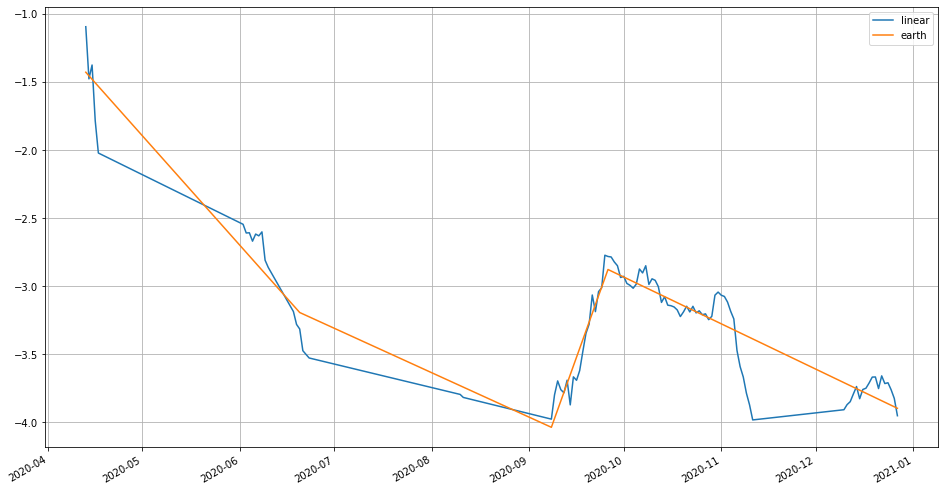

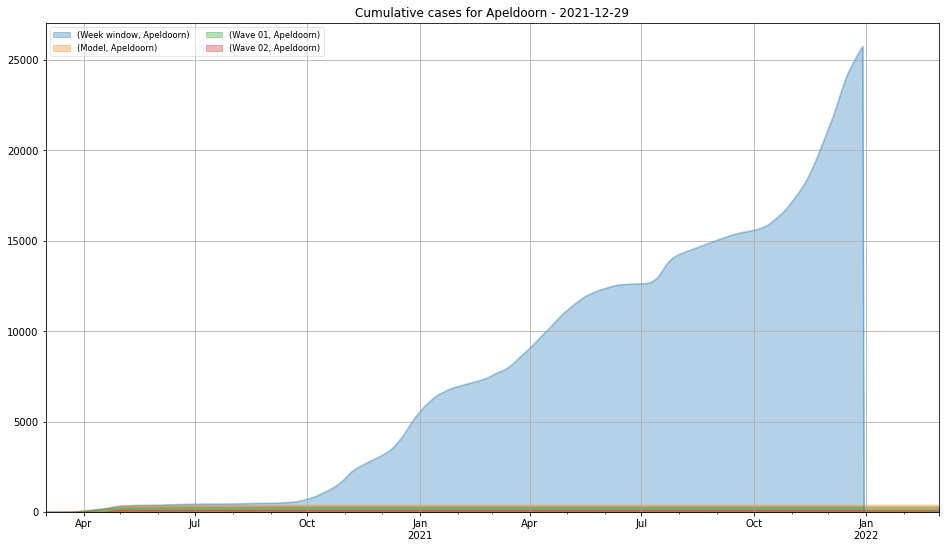

In [70]:
# Select regions to fit.
regions = np.sort(df[region].unique())

# Choose whether to output plots per region.
showplots = True

measure  = cases
smeasure = 'Week window' # smoothed
rmeasure = 'rcases'      # remaining
pmeasure = 'Model'       # predicted
wmeasure = 'Wave '       # waves

for region in ['Apeldoorn']:

    wave = 1

    df_geo[(pmeasure, region)] = 0
    df_geo[(smeasure, region)] = df_geo[measure][region].loc[:].rolling(7).mean()
    df_geo[(rmeasure, region)] = df_geo[smeasure][region]

    plotlist = [(smeasure, region), (pmeasure, region)]

    #countryname = df[df['geoId'] == country]['countriesAndTerritories'].iloc[0]
    #popdata = df[df['geoId'] == country]['popData2019'].iloc[0]

    #mincases = popdata / 1e6
    mincases = 2
    #mincases = df_geo[smeasure][country].sum() / 5000
    #mincases = max(popdata / 1e6, 10)

    print('Running multiple wave analysis for \'{}\''.format(region))
    print('Minimum number of cases is {:1.0f}'.format(mincases))

    while True:
        curwave = wmeasure + str((wave) + 1000)[-2:]
        df_geo[(curwave, region)] = 0

        df_pred = pd.DataFrame({'daynum':df_geo['daynum'],
                                measure:df_geo[rmeasure][region]})
        
        df_pred['gumdiv'] = df_pred[measure] / df_pred[measure].cumsum()
        df_pred = df_pred[(df_pred['gumdiv'] > 0) & (df_pred[measure] > mincases)]

        df_pred['linear'] = np.log(df_pred['gumdiv'])

        df_pred = df_pred[(df_pred['linear'] < -8/20) &
                          (df_pred['linear'] > -8/2)]

        if len(df_pred) <= 1:
            print('--- no data left')
            break

        eax = df_pred['daynum'].values.reshape(-1, 1)
        eay = df_pred['linear'].values.reshape(-1, 1)

        #eamodel = Earth()
        #eamodel = Earth(minspan=0)
        eamodel = Earth(minspan=1, penalty=0, endspan=0, thresh=1e-9, check_every=1)
        eamodel.fit(eax, eay)

        df_pred['earth'] = eamodel.predict(eax)

        daymin = df_pred['daynum'].min()
        daymax = df_pred['daynum'].max()

        #df_pred['gbgrad'] = np.gradient(df_pred['linear'])
        #df_pred['eagrad'] = np.gradient(df_pred['earth'])
        df_pred['gbgrad'] = df_pred['linear'] - df_pred['linear'].shift(1)
        df_pred['eagrad'] = df_pred['earth'] - df_pred['earth'].shift(1)
        
        (
            df_pred
            [
                [
#                    'gbgrad',
#                    'eagrad',
                    'linear',
                    'earth',
                ]
            ]
            .plot(
                figsize=(16, 9),
                grid=True,
            )
        )

        fitmod = export.export_python_function(eamodel)

        df_pred['knot'] = ((abs(df_pred['eagrad'] - df_pred['eagrad'].shift(1)) > 1e-6) |
                           (df_pred['daynum'] == (daymin + 1)) |
                           (df_pred['daynum'] == daymax))
        df_pred['daycount'] = df_pred.reset_index().index

        df_knot = df_pred[df_pred['knot']][['daynum', 'daycount', 'eagrad']]
        df_knot['daysdata'] = df_knot['daycount'].shift(-1) - df_knot['daycount']
        df_knot['daystime'] = df_knot['daynum'].shift(-1) - df_knot['daynum']

        df_knot['cand'] = ((df_knot['eagrad'] < -2/80) &
                           (df_knot['daysdata'] >= 3))
        
        df_knot['since'] = df_knot['daynum'] - daymin
        df_knot['score'] = (df_knot['eagrad'] ** 2) * np.sqrt(df_knot['daysdata'] / np.sqrt(df_knot['since']))
        #df_knot['score'] = - df_knot['eagrad'] * df_knot['daysdata']
        df_knot['choice'] = df_knot['score'] == df_knot[df_knot['cand']]['score'].max()

        choice = df_knot[df_knot['choice']]
        
        if len(choice) == 0:
            print('--- no data for wave')
            break

        lower = choice['daynum'].values[0]
        upper = choice['daysdata'].values[0] + lower

        df_pred = df_pred[(df_pred['daynum'] >= lower) &
                          (df_pred['daynum'] <= upper)].copy()

        slope = (fitmod([[upper]])[0] - fitmod([[lower]])[0]) / (upper - lower)
        intercept = fitmod([[lower]])[0] - (lower * slope)

        beta = - 1 / slope
        mu = beta * (intercept + np.log(beta))

        df_pred['pgumb'] = gumpdf(df_pred['daynum'], beta, mu)
        df_pred['scale'] = df_pred[measure] / df_pred['pgumb']

        final = df_pred['scale'].mean()
        fincv = df_pred['scale'].std() / final

        if ((1 - fincv) ** 2) < 1/2:
            print('--- no significant wave')
            break

        df_geo[(curwave, region)] = final * gumpdf(df_geo['daynum'], beta, mu)        

        peak = df_geo[df_geo[(curwave, region)] == df_geo[(curwave, region)].max()].index.min()
        start = df_geo[(df_geo[(curwave, region)] >= 1) &
                       (df_geo[(curwave, region)].index < peak)].index.min()
        floor = df_geo[(df_geo[(curwave, region)] < 1) &
                       (df_geo[(curwave, region)].index > peak)].index.min()

        print('{} beta {:6.3f} mu {:3.0f} fit {:5.3f} peak {} from {} to {} size {:1.0f}'.format(
            curwave, beta, mu, (1 - fincv) ** 2, peak.date(), start.date(), floor.date(), final))
       
        df_geo[(pmeasure, region)] += df_geo[(curwave, region)]
        df_geo[(rmeasure, region)] -= df_geo[(curwave, region)]
        plotlist += [(curwave, region)]
        wave += 1
        
    if showplots:
        (
            df_geo
            [plotlist]
            .loc['20200301':'20220301']
            .plot(
                figsize=(16, 9),
                grid=True,
                kind='area',
                stacked=False,
                alpha=1/3,
                title='Daily new cases for '+region+' - '+lastdate.strftime('%Y-%m-%d'),
            )
            .legend(
                loc='upper left',
                fontsize='small',
                framealpha=1/2,
                ncol=2,
            )
        )

        (
            df_geo
            [plotlist]
            .loc['20200301':'20220301']
            .cumsum()
            .plot(
                figsize=(16, 9),
                grid=True,
                kind='area',
                stacked=False,
                alpha=1/3,
                title='Cumulative cases for '+region+' - '+lastdate.strftime('%Y-%m-%d'),
            )
            .legend(
                loc='upper left',
                fontsize='small',
                framealpha=1/2,
                ncol=2,
            )
        )


In [71]:
#df_geo.reset_index(inplace=True)
df_geo

Deceased                                               \
Municipality_name 's-Gravenhage 's-Hertogenbosch Aa en Hunze Aalsmeer Aalten   
2020-02-28                  0.0              0.0         0.0      0.0    0.0   
2020-02-29                  0.0              0.0         0.0      0.0    0.0   
2020-03-01                  0.0              0.0         0.0      0.0    0.0   
2020-03-02                  0.0              0.0         0.0      0.0    0.0   
2020-03-03                  0.0              0.0         0.0      0.0    0.0   
...                         ...              ...         ...      ...    ...   
2022-12-25                  NaN              NaN         NaN      NaN    NaN   
2022-12-26                  NaN              NaN         NaN      NaN    NaN   
2022-12-27                  NaN              NaN         NaN      NaN    NaN   
2022-12-28                  NaN              NaN         NaN      NaN    NaN   
2022-12-29                  NaN              NaN         NaN      NaN    NaN   

                                                                           \
Municipality_name Achtkarspelen Alblasserdam Albrandswaard Alkmaar Almelo   
2020-02-28                  0.0          0.0           0.0     0.0    0.0   
2020-02-29                  0.0          0.0           0.0     0.0    0.0   
2020-03-01                  0.0          0.0           0.0     0.0    0.0   
2020-03-02                  0.0          0.0           0.0     0.0    0.0   
2020-03-03                  0.0          0.0           0.0     0.0    0.0   
...                         ...          ...           ...     ...    ...   
2022-12-25                  NaN          NaN           NaN     NaN    NaN   
2022-12-26                  NaN          NaN           NaN     NaN    NaN   
2022-12-27                  NaN          NaN           NaN     NaN    NaN   
2022-12-28                  NaN          NaN           NaN     NaN    NaN   
2022-12-29                  NaN          NaN           NaN     NaN    NaN   

                   ...  Total_reported                    daynum  \
Municipality_name  ... Zwartewaterland Zwijndrecht Zwolle          
2020-02-28         ...             0.0         0.0    0.0      0   
2020-02-29         ...             0.0         0.0    0.0      1   
2020-03-01         ...             0.0         0.0    0.0      2   
2020-03-02         ...             0.0         0.0    0.0      3   
2020-03-03         ...             0.0         0.0    0.0      4   
...                ...             ...         ...    ...    ...   
2022-12-25         ...             NaN         NaN    NaN   1031   
2022-12-26         ...             NaN         NaN    NaN   1032   
2022-12-27         ...             NaN         NaN    NaN   1033   
2022-12-28         ...             NaN         NaN    NaN   1034   
2022-12-29         ...             NaN         NaN    NaN   1035   

                          Model Week window    rcases       Wave 01  \
Municipality_name     Apeldoorn   Apeldoorn Apeldoorn     Apeldoorn   
2020-02-28         6.343511e-05         NaN       NaN  6.343511e-05   
2020-02-29         1.639171e-04         NaN       NaN  1.639171e-04   
2020-03-01         3.958144e-04         NaN       NaN  3.958144e-04   
2020-03-02         8.972015e-04         NaN       NaN  8.972015e-04   
2020-03-03         1.917111e-03         NaN       NaN  1.917111e-03   
...                         ...         ...       ...           ...   
2022-12-25         4.098109e-29         NaN       NaN  4.098109e-29   
2022-12-26         3.825392e-29         NaN       NaN  3.825392e-29   
2022-12-27         3.570823e-29         NaN       NaN  3.570823e-29   
2022-12-28         3.333195e-29         NaN       NaN  3.333195e-29   
2022-12-29         3.111381e-29         NaN       NaN  3.111381e-29   

                         Wave 02   Wave 03  
Municipality_name      Apeldoorn Apeldoorn  
2020-02-28          0.000000e+00         0  
2020-02-29          0.000000e+00    

In [72]:
df_out = df_geo.melt(id_vars=['index'], value_vars=[pmeasure])
df_out = df_geo.melt(value_vars=[pmeasure])
pmeasure
#df_out.columns = (['date', 'type', 'location', 'value'])
#df_out.to_csv('zzcorgem.csv')

KeyError: "The following 'id_vars' are not present in the DataFrame: ['index']"

Keep exploring! Stay home, wash your hands, keep your distance.